In [35]:
import pandas as pandas
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [26]:
data = pd.read_csv("/content/agricultural_yield.csv")
data.head()

,Soil_Quality,Seed_Variety,Fertilizer_Amount_kg_per_hectare,Sunny_Days,Rainfall_mm,Irrigation_Schedule,Yield_kg_per_hectare
0,93.304721,0,132.522218,96.670922,602.386237,3,278.986563
1,83.674653,1,57.283997,99.007556,466.518251,8,836.434840
2,65.963033,1,227.895479,104.844272,510.320495,4,785.881787
3,78.692834,1,176.314126,90.136191,354.350914,5,807.884526
4,72.415684,1,160.070418,101.221668,443.993788,10,1064.542374


In [27]:
x = data[['Soil_Quality', 'Seed_Variety', 'Fertilizer_Amount_kg_per_hectare', 'Sunny_Days', 'Rainfall_mm', 'Irrigation_Schedule']]
y = data[['Yield_kg_per_hectare']]

In [28]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [29]:
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=x_train.shape[1]))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [30]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

In [31]:
history = model.fit(x_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 253204.8281 - mae: 430.5399 - val_loss: 55586.9570 - val_mae: 188.6431
Epoch 2/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 47958.6445 - mae: 177.5321 - val_loss: 39637.6016 - val_mae: 157.9788
Epoch 3/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 38510.1641 - mae: 159.5923 - val_loss: 34983.0312 - val_mae: 149.3559
Epoch 4/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 37282.5273 - mae: 157.7253 - val_loss: 32386.0527 - val_mae: 144.1789
Epoch 5/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 32831.8242 - mae: 147.4354 - val_loss: 31427.5098 - val_mae: 143.1455
Epoch 6/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 32745.3965 - mae: 148.1944 - val_loss: 29847.6309 - val_mae: 139.1404
Epoch 7/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 30172.4766 - mae: 141.5198 - val_loss: 29382.5723 - val_mae: 139.0916
Epoch 8/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 30036.0020 - mae: 141.4846 - val_loss: 28295.

In [32]:
test_loss, test_mae = model.evaluate(x_test, y_test)
print(f'Test Mean Absolute Error: {test_mae:2f}')

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2582.7178 - mae: 40.9804 
Test Mean Absolute Error: 39.069157


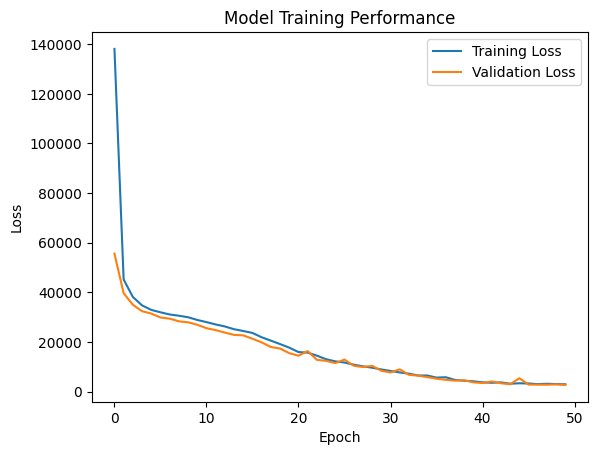

In [33]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Model Training Performance')
plt.legend()
plt.show()

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


<ipython-input-39-f920ce905716>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test, label='Actual Yield')
<ipython-input-39-f920ce905716>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pred, label='Predicted Yield')


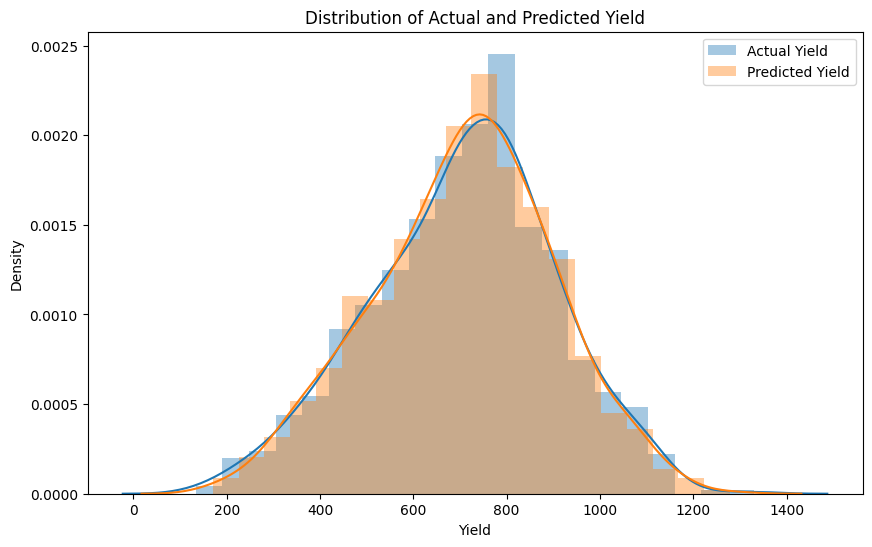

In [39]:
# Distribution plots
y_pred = model.predict(x_test)
plt.figure(figsize=(10, 6))
sns.distplot(y_test, label='Actual Yield')
sns.distplot(y_pred, label='Predicted Yield')
plt.xlabel("Yield")
plt.ylabel("Density")
plt.title("Distribution of Actual and Predicted Yield")
plt.legend()
plt.show()

In [37]:
predictions = model.predict(x_test)
predictions

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


array([[ 448.2903 ],
       [ 657.76294],
       [1079.4839 ],
       [ 660.08203],
       [ 803.4889 ],
       [ 997.12976],
       [ 314.83533],
       [ 609.4289 ],
       [ 464.94714],
       [ 803.8953 ],
       [ 595.19965],
       [ 679.0999 ],
       [ 623.86334],
       [ 745.6761 ],
       [ 853.15   ],
       [ 679.74097],
       [ 957.9549 ],
       [ 473.6749 ],
       [ 586.4334 ],
       [ 366.53888],
       [ 799.0357 ],
       [ 801.47577],
       [ 370.39017],
       [ 817.9688 ],
       [1013.8869 ],
       [ 608.15424],
       [ 662.796  ],
       [ 972.8377 ],
       [ 655.2491 ],
       [ 634.4461 ],
       [ 686.9792 ],
       [ 809.60504],
       [ 825.6975 ],
       [ 813.3387 ],
       [ 475.28183],
       [ 710.8662 ],
       [ 720.13666],
       [1013.7487 ],
       [ 194.50598],
       [ 658.4191 ],
       [ 924.6895 ],
       [ 888.8444 ],
       [ 789.31464],
       [ 771.5699 ],
       [ 587.9221 ],
       [ 835.53595],
       [ 622.6058 ],
       [ 556.

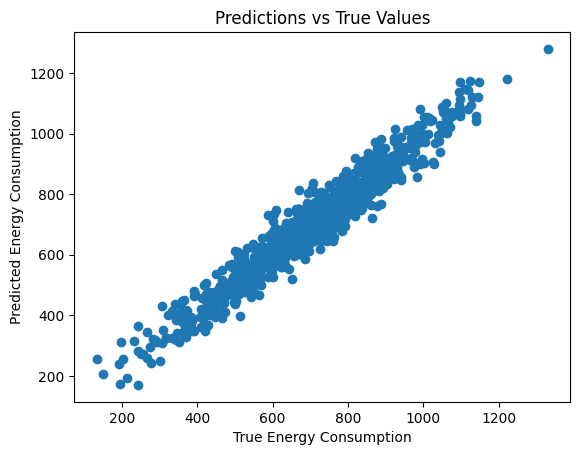

In [38]:
plt.scatter(y_test, predictions)
plt.xlabel("True Energy Consumption")
plt.ylabel("Predicted Energy Consumption")
plt.title("Predictions vs True Values")
plt.show()